In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
ds = pd.read_csv('diabetes.csv')

In [21]:
ds.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


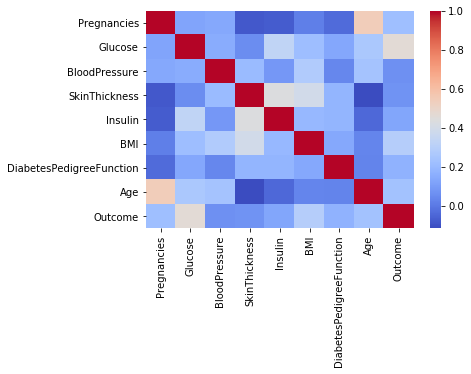

In [22]:
plt.figure()
sns.heatmap(ds.corr(), cmap='coolwarm')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
X = ds[[each for each in ds.columns if each != "Outcome"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [25]:
y = pd.DataFrame(ds['Outcome'], columns=['Outcome'])
y.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 1 columns):
Outcome    768 non-null int64
dtypes: int64(1)
memory usage: 6.1 KB


,Outcome
0,1
1,0
2,1
3,0
4,1


In [26]:
split = int(0.8 * ds.shape[0])
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
X_test, y_test = X_test.reset_index(drop=True), y_test.reset_index(drop=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614, 1) (154, 1)


In [27]:
forest = RandomForestClassifier(criterion='entropy')
forest.fit(X_train, y_train)

C:\Users\monica pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\monica pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
forest.score(X_test, y_test)

0.7792207792207793

In [33]:

from pandas import read_csv
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

In [34]:
ds.shape

(768, 9)

In [30]:
ds = ds.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(ds[:, 1:], ds[:, 0], test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [35]:
model = Sequential()

model.add(Dense(256, input_shape=(8, )))
model.add(Activation('sigmoid'))

model.add(Dense(64))
model.add(Activation('sigmoid'))
# model.add(Dense(64, activation='sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 19,402
Trainable params: 19,402
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [37]:
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

In [38]:
hist = model.fit(X_train, y_train_one_hot,
          shuffle=True,
          epochs=5,
          batch_size=128,
          validation_data=(X_test, y_test_one_hot)
         )

ValueError: Error when checking target: expected activation_3 to have shape (10,) but got array with shape (18,)

In [12]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'pydotplus'

In [16]:
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, filled=True,rounded=True)

NameError: name 'StringIO' is not defined

In [ ]:
X_train.columns

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())